# Explorative Datenanalyse
Im Folgenden werden die gemessenen Index-Werte der Brokkoli analysiert. Im Vorfeld wurden diese bereits innerhalb der Voronoi-Zellen segmentiert, das heisst Es werden nur noch die Pixel gewertet, welche zum Brokkoli gehören, ohne die Erde darum zu berücksichtigen.

In [140]:
%reset

# Datenabfrage von Server-DB
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class font:
    BOLD = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'

# Liste der Daten, die berücksichtigt werden
dates = ['2019-04-18', '2019-04-25', '2019-05-01', '2019-05-09', '2019-05-16', '2019-05-24', '2019-06-04','2019-06-13', 
         '2019-06-18']

# Angeben, ob Blacklist einbezogen wird
useBlacklist = True

# Verbindungsaufbau
server = 'deepbroccoliserver.database.windows.net'
database = 'DeepBroccoliDatabase'
username = 'ntb'
password = 'brokkoli_2019'
driver= '{SQL Server}'
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

# Abfrage definieren und ausführen: Alle Brokkoli mit allen dazugehörigen Messwerten 
query = '''
select dbo.broccoli.id, dbo.broccoli.cropWeight, dbo.broccoli.cropMissing, dbo.broccoli.cropOverripe, 
dbo.broccoli.cropRudimentary, dbo.broccoli.cropRotten, dbo.broccoli.cropUnripe, dbo.broccoli.cropNoBlossom, 
dbo.broccoli.rowNumber, dbo.broccolivalues.timestamp, dbo.broccoli.lat, dbo.broccoli.long, dbo.broccolivalues.pixelCount, 
dbo.broccolivalues.maxNDVI, dbo.broccolivalues.minNDVI, dbo.broccolivalues.meanNDVI, dbo.broccolivalues.medianNDVI, 
dbo.broccolivalues.NDVI_15_QUANTILE, dbo.broccolivalues.NDVI_25_QUANTILE, dbo.broccolivalues.NDVI_75_QUANTILE, 
dbo.broccolivalues.NDVI_85_QUANTILE,
dbo.broccolivalues.maxNDRE, dbo.broccolivalues.minNDRE, dbo.broccolivalues.meanNDRE, dbo.broccolivalues.medianNDRE,
dbo.broccolivalues.NDRE_15_QUANTILE, dbo.broccolivalues.NDRE_25_QUANTILE, dbo.broccolivalues.NDRE_75_QUANTILE,
dbo.broccolivalues.NDRE_85_QUANTILE
from dbo.broccoli inner join dbo.broccolivalues on dbo.broccoli.id = dbo.broccolivalues.id'''

# Blacklist einbeziehen: Brokkoli-IDs in Blacklist werden gefiltert
if useBlacklist:
    query = query + ''' where dbo.broccoli.id not in (select broccoli_id from dbo.broccoliBlacklist)'''

broccoli_data = pd.read_sql_query(query, cnxn)
cnxn.close()

# Löschen von Datensätzen mit NaN-Werten (Ist der Fall falls pixelCount == 0)
#print()
#print("Anzahl Datensätze: " + str(len(broccoli_data)))

#broccoli_data.dropna(inplace=True)
#print("Anzahl Datensätze ohne NaN: " + str(len(broccoli_data)))
#print()

# Describe: Erste Übersicht
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    print(font.BOLD + font.UNDERLINE + date + font.END)
    display(broccoli_data_byDate.describe())
    print()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
2019-04-18


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,37.410145,0.598889,0.424898,0.508310,0.508736,...,0.546759,0.563153,0.190512,-0.013122,0.088713,0.088916,0.038438,0.056156,0.121499,0.138751
std,779.385848,140.982268,1.701552,0.000404,0.000295,9.230402,0.042482,0.030691,0.037155,0.039452,...,0.040960,0.041587,0.043510,0.046187,0.026980,0.028796,0.033607,0.030972,0.029669,0.031474
min,1.000000,32.000000,1.000000,47.217185,9.492415,7.000000,0.309548,0.226267,0.273390,0.271562,...,0.299500,0.304524,0.065542,-0.229784,-0.030301,-0.038446,-0.117262,-0.068451,0.008623,0.033885
25%,668.500000,467.000000,2.000000,47.217559,9.492843,31.000000,0.571925,0.405685,0.484948,0.483071,...,0.519623,0.536239,0.160061,-0.040633,0.071721,0.071928,0.017181,0.037039,0.102800,0.118557
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,37.000000,0.600231,0.425229,0.509222,0.509751,...,0.547799,0.563648,0.187688,-0.006417,0.092238,0.092535,0.044927,0.062386,0.122096,0.137852
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,43.000000,0.626902,0.445488,0.533910,0.535770,...,0.574098,0.591872,0.215755,0.021852,0.106976,0.108778,0.062828,0.077606,0.140737,0.158711
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,78.000000,0.728941,0.539897,0.646206,0.663208,...,0.699201,0.705629,0.422623,0.109630,0.161575,0.177574,0.116594,0.154753,0.282104,0.288997



2019-04-25


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,46.112466,0.679512,0.481203,0.583120,0.586240,...,0.630467,0.647758,0.292730,0.023408,0.168077,0.170589,0.102160,0.126590,0.212832,0.234079
std,779.385848,140.982268,1.701552,0.000404,0.000295,12.184941,0.051627,0.036737,0.046548,0.049254,...,0.050712,0.050931,0.063680,0.059747,0.036883,0.039542,0.040595,0.038435,0.045698,0.050211
min,1.000000,32.000000,1.000000,47.217185,9.492415,2.000000,0.348900,0.288066,0.319579,0.319579,...,0.334239,0.340104,0.072330,-0.232045,0.053104,0.055825,-0.117065,-0.079874,0.056741,0.062977
25%,668.500000,467.000000,2.000000,47.217559,9.492843,38.000000,0.649449,0.459034,0.555060,0.555155,...,0.599772,0.616325,0.249943,-0.011633,0.144202,0.144817,0.075102,0.101716,0.183952,0.202310
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,46.000000,0.680958,0.482467,0.584308,0.587821,...,0.632082,0.650322,0.285900,0.028109,0.165865,0.169901,0.102394,0.126850,0.209333,0.229406
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,54.000000,0.716108,0.507165,0.617241,0.621951,...,0.667516,0.684196,0.325938,0.063892,0.189145,0.193575,0.129866,0.151910,0.236131,0.258961
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,101.000000,0.810579,0.580237,0.698420,0.724812,...,0.750291,0.769226,0.574725,0.178572,0.304583,0.331391,0.230546,0.259992,0.402568,0.426826



2019-05-01


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,125.839953,0.798942,0.561470,0.682567,0.686701,...,0.733162,0.753290,0.283365,-0.001075,0.140253,0.140540,0.086222,0.106079,0.174229,0.193679
std,779.385848,140.982268,1.701552,0.000404,0.000295,29.665363,0.036321,0.025090,0.031510,0.033774,...,0.034353,0.034749,0.068823,0.061046,0.033166,0.034838,0.041252,0.038491,0.035167,0.038495
min,1.000000,32.000000,1.000000,47.217185,9.492415,12.000000,0.518813,0.362658,0.432012,0.428802,...,0.492123,0.502049,0.094710,-0.305937,-0.035179,-0.044257,-0.146473,-0.111822,0.000673,0.039560
25%,668.500000,467.000000,2.000000,47.217559,9.492843,109.500000,0.781667,0.549062,0.667233,0.669827,...,0.715676,0.736244,0.233217,-0.032878,0.125433,0.124944,0.069167,0.090624,0.155634,0.171335
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,127.000000,0.803733,0.565196,0.686448,0.690078,...,0.736934,0.757332,0.269320,0.009127,0.141974,0.143087,0.094110,0.112448,0.171987,0.188173
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,145.000000,0.822536,0.578036,0.702539,0.707746,...,0.755793,0.775783,0.321224,0.042765,0.157027,0.157972,0.112649,0.128890,0.188798,0.210336
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,344.000000,0.885956,0.621285,0.764486,0.780028,...,0.828266,0.847945,0.634640,0.142997,0.266080,0.265132,0.213776,0.247302,0.316833,0.419278



2019-05-09


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,337.265041,0.862779,0.605041,0.766804,0.784535,...,0.815115,0.827435,0.252417,-0.113130,0.092805,0.098734,0.029709,0.058222,0.132700,0.152841
std,779.385848,140.982268,1.701552,0.000404,0.000295,76.110373,0.017931,0.012367,0.020229,0.022464,...,0.018581,0.017840,0.059698,0.076773,0.023406,0.023440,0.035688,0.028727,0.025582,0.030391
min,1.000000,32.000000,1.000000,47.217185,9.492415,19.000000,0.708534,0.501618,0.597759,0.581467,...,0.660907,0.665722,0.101483,-0.451823,0.005066,0.009349,-0.151167,-0.077773,0.039751,0.044713
25%,668.500000,467.000000,2.000000,47.217559,9.492843,298.000000,0.856692,0.600703,0.760464,0.777393,...,0.808954,0.821609,0.210717,-0.160309,0.078089,0.084515,0.007989,0.039863,0.116624,0.133575
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,345.000000,0.865299,0.607263,0.770467,0.788872,...,0.818638,0.830413,0.243358,-0.108237,0.093162,0.099203,0.031389,0.060393,0.130404,0.147994
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,384.000000,0.873116,0.611991,0.779017,0.797624,...,0.825970,0.837623,0.283246,-0.057263,0.106993,0.113415,0.055420,0.078315,0.146293,0.167838
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,1032.000000,0.910571,0.641869,0.819025,0.837019,...,0.867475,0.881187,0.572957,0.077098,0.203677,0.203830,0.123095,0.158024,0.265532,0.344594



2019-05-16


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,451.688950,0.885108,0.620405,0.770621,0.778061,...,0.818473,0.836882,0.385226,-0.019829,0.200614,0.202788,0.136563,0.161724,0.242331,0.264955
std,779.385848,140.982268,1.701552,0.000404,0.000295,106.623471,0.023248,0.015377,0.023449,0.025032,...,0.024676,0.024187,0.092442,0.094783,0.034032,0.033049,0.039638,0.035283,0.038641,0.046049
min,1.000000,32.000000,1.000000,47.217185,9.492415,15.000000,0.640893,0.448223,0.556581,0.565671,...,0.618026,0.635629,0.125278,-0.478812,0.045758,0.046193,-0.060572,-0.027874,0.096930,0.120490
25%,668.500000,467.000000,2.000000,47.217559,9.492843,395.000000,0.876668,0.613207,0.761049,0.767060,...,0.807381,0.826692,0.314693,-0.071061,0.179658,0.183381,0.114102,0.142022,0.218223,0.235773
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,465.000000,0.888384,0.622308,0.774026,0.781277,...,0.821545,0.840208,0.363347,-0.003588,0.199170,0.202900,0.141633,0.164404,0.237378,0.256402
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,524.000000,0.898940,0.629389,0.785282,0.793822,...,0.833878,0.851781,0.437285,0.049738,0.221250,0.223420,0.164404,0.185725,0.262947,0.287711
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,728.000000,0.936661,0.656853,0.822826,0.838612,...,0.879668,0.891404,0.774605,0.155240,0.405552,0.422640,0.229620,0.258156,0.583429,0.629100



2019-05-24


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,992.890287,0.913663,0.639449,0.795307,0.803189,...,0.843781,0.861441,0.464482,-0.006826,0.259785,0.263272,0.193640,0.219646,0.304147,0.326153
std,779.385848,140.982268,1.701552,0.000404,0.000295,212.364809,0.023943,0.017338,0.033203,0.038662,...,0.034425,0.031910,0.163666,0.115277,0.135127,0.137120,0.128919,0.132518,0.141287,0.144268
min,1.000000,32.000000,1.000000,47.217185,9.492415,10.000000,0.751347,0.534392,0.620162,0.607506,...,0.674685,0.711386,0.144996,-0.465496,-0.088654,-0.105472,-0.172560,-0.149981,-0.041195,0.000913
25%,668.500000,467.000000,2.000000,47.217559,9.492843,872.500000,0.900721,0.629431,0.775466,0.779569,...,0.823038,0.842449,0.333879,-0.082565,0.160487,0.163028,0.100422,0.124210,0.201094,0.220627
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,991.000000,0.916467,0.640486,0.799266,0.805798,...,0.847883,0.865752,0.414159,-0.008409,0.229045,0.231213,0.170898,0.192430,0.268113,0.287084
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,1112.500000,0.929308,0.650990,0.816472,0.827869,...,0.865687,0.881515,0.581992,0.070518,0.324991,0.328015,0.254578,0.280370,0.372542,0.395557
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,2325.000000,0.981058,0.757975,0.913307,0.928941,...,0.949230,0.957152,0.885469,0.425145,0.659116,0.665100,0.595982,0.624422,0.717508,0.744636



2019-06-04


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,1147.355879,0.888555,0.626872,0.785706,0.792397,...,0.822581,0.837180,0.345967,-0.179286,0.111028,0.116760,0.021368,0.057661,0.169910,0.198119
std,779.385848,140.982268,1.701552,0.000404,0.000295,163.863589,0.021941,0.020948,0.025811,0.026008,...,0.023788,0.023213,0.068563,0.079946,0.058894,0.060163,0.065387,0.063696,0.058176,0.057585
min,1.000000,32.000000,1.000000,47.217185,9.492415,67.000000,0.708941,0.541214,0.646173,0.648704,...,0.678211,0.691166,0.077391,-0.521817,-0.087258,-0.085649,-0.209394,-0.137427,-0.044954,-0.021634
25%,668.500000,467.000000,2.000000,47.217559,9.492843,1071.000000,0.876183,0.614129,0.770013,0.776105,...,0.808754,0.824213,0.302058,-0.226702,0.071047,0.075385,-0.022807,0.013948,0.129610,0.159283
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,1152.000000,0.891929,0.627600,0.788585,0.795604,...,0.826442,0.840800,0.343587,-0.170852,0.116087,0.122847,0.024034,0.062370,0.176312,0.203482
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,1222.000000,0.904340,0.636853,0.804616,0.811634,...,0.840096,0.853946,0.388263,-0.124334,0.154111,0.160645,0.067576,0.104660,0.212986,0.240557
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,2274.000000,0.944795,0.732271,0.843377,0.851201,...,0.882042,0.899964,0.570194,0.047755,0.250074,0.257886,0.193233,0.215394,0.304265,0.346955



2019-06-13


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,1455.834841,0.932889,0.708893,0.854168,0.858615,...,0.887061,0.899439,0.489600,0.021120,0.283183,0.286757,0.198082,0.228654,0.341005,0.367132
std,779.385848,140.982268,1.701552,0.000404,0.000295,186.198276,0.012632,0.034908,0.018116,0.018480,...,0.017489,0.016726,0.055032,0.109513,0.046191,0.047507,0.052819,0.050603,0.045183,0.044617
min,1.000000,32.000000,1.000000,47.217185,9.492415,81.000000,0.682991,0.529922,0.605577,0.611256,...,0.631479,0.640784,0.247273,-0.453599,0.083418,0.105859,-0.078155,0.003100,0.148243,0.160145
25%,668.500000,467.000000,2.000000,47.217559,9.492843,1366.000000,0.928180,0.683560,0.846963,0.851109,...,0.879606,0.892223,0.452708,-0.032580,0.253189,0.255377,0.159846,0.191931,0.313357,0.340295
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,1437.000000,0.934412,0.712580,0.856236,0.860367,...,0.888706,0.900920,0.487262,0.038682,0.280980,0.285523,0.195003,0.226394,0.340104,0.366511
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,1514.000000,0.939818,0.734018,0.864691,0.869089,...,0.897207,0.909031,0.525809,0.094805,0.313907,0.318763,0.235010,0.264901,0.371655,0.397230
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,3058.000000,0.956885,0.806188,0.896153,0.904995,...,0.926101,0.933852,0.689164,0.235499,0.401273,0.412744,0.338219,0.355898,0.463674,0.492195



2019-06-18


,id,cropWeight,rowNumber,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2543.000000,2427.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,...,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,1349.298073,554.036671,3.472277,47.217912,9.493050,1245.759733,0.905701,0.762847,0.852384,0.855440,...,0.871345,0.878638,0.371499,0.125832,0.270397,0.271363,0.235662,0.248349,0.294276,0.306422
std,779.385848,140.982268,1.701552,0.000404,0.000295,162.928605,0.011772,0.033897,0.012968,0.012156,...,0.011204,0.011134,0.023460,0.069725,0.014749,0.014182,0.018009,0.015814,0.014253,0.014741
min,1.000000,32.000000,1.000000,47.217185,9.492415,124.000000,0.740451,0.588493,0.677461,0.678631,...,0.708250,0.715861,0.275615,-0.311951,0.147690,0.144518,0.071170,0.091299,0.179733,0.193020
25%,668.500000,467.000000,2.000000,47.217559,9.492843,1168.500000,0.899031,0.752979,0.848263,0.851019,...,0.866455,0.873314,0.355268,0.092728,0.263308,0.263872,0.228516,0.241283,0.285882,0.297295
50%,1365.000000,555.000000,3.000000,47.217921,9.493057,1231.000000,0.905527,0.768803,0.853848,0.856529,...,0.871946,0.879078,0.368900,0.143584,0.271652,0.272678,0.237591,0.249833,0.294896,0.306483
75%,2030.000000,646.000000,5.000000,47.218265,9.493268,1297.500000,0.913293,0.782791,0.859125,0.861824,...,0.877461,0.885012,0.385721,0.175644,0.280070,0.280686,0.246468,0.257883,0.303936,0.316141
max,2681.000000,1090.000000,6.000000,47.218642,9.493662,2486.000000,0.935801,0.842558,0.889731,0.892876,...,0.906542,0.914740,0.487948,0.233851,0.309804,0.309437,0.281635,0.290637,0.339671,0.356725


In [141]:
# True/False Erntelabels zu 0/1
broccoli_data.cropMissing = broccoli_data.cropMissing.astype(int)
broccoli_data.cropOverripe = broccoli_data.cropOverripe.astype(int)
broccoli_data.cropRudimentary = broccoli_data.cropRudimentary.astype(int)
broccoli_data.cropRotten = broccoli_data.cropRotten.astype(int)
broccoli_data.cropUnripe = broccoli_data.cropUnripe.astype(int)
broccoli_data.cropNoBlossom = broccoli_data.cropNoBlossom.astype(int)


## Analyse der Pixel-Anzahl (pixelCount)
Als erstes werden die Anzahl Pixel, die nach der Segmentierung eine Brokkoli-Pflanze darstellen, analysiert. Hier wird versucht, inkorrekt oders seltsam segmentierte Daten zu finden.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

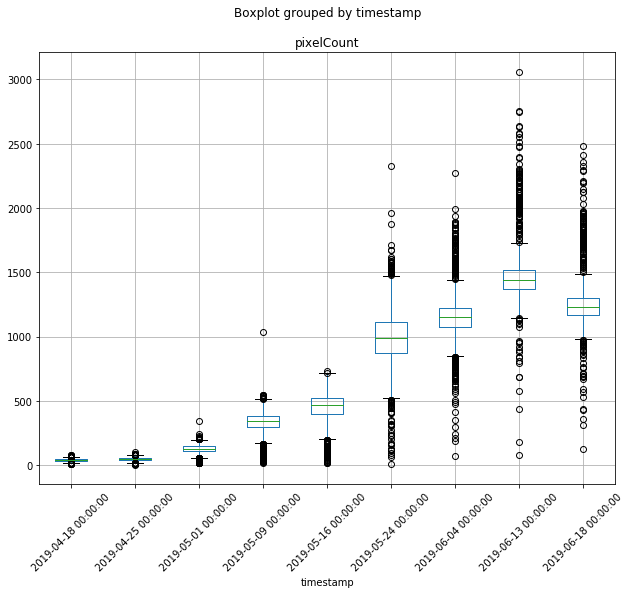

In [142]:
# Boxplot der Pixelanzahl gruppiert nach Datum
broccoli_data.boxplot(by="timestamp", column=['pixelCount'], figsize=(10,8))
plt.xticks(rotation=45)

### Zwischenfazit Pixel-Anzahl Boxplot
Es ist komisch, dass vom 13.06.19 auf den 18.06.19 der pixelCount niedriger wird.<br>
ToDo: Die Segmentierung muss geprüft und allenfalls überarbeitet werden.

In [143]:
# Analyse pixelCount: Datensätze in Bereich ausserhalb bestimmter Quantile analysieren
# Erstellung von CSV und HTML Export zur manuellen Analyse und Erstellung eine Blacklist mit inkorrekt segmentierten Datensätzen

pixelCountNotable = pd.DataFrame()
for date in dates:    
    # Listen mit Pflanzen mit pixelCount > [quantile_Lower]-Quantil bzw. < [quantile_Upper]-Quantil erstellen
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    
    quantile_Lower = 0.03
    quantile_Upper = 0.97
    
    underLowerQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount < 
                                        broccoli_data_byDate['pixelCount'].quantile(quantile_Lower)][['id', 'pixelCount']]
    overUpperQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount > 
                                       broccoli_data_byDate['pixelCount'].quantile(quantile_Upper)][['id', 'pixelCount']]
    
    # Liste aller gefilterter IDs nach Datum erstellen
    underLowerQuant[date + "_Under"] = 1
    overUpperQuant[date + "_Over"] = 1
    underLowerQuant.set_index('id', inplace=True)
    overUpperQuant.set_index('id', inplace=True)
    pixelCountNotable = pd.concat([pixelCountNotable, underLowerQuant[date + "_Under"]], axis=1)
    pixelCountNotable = pd.concat([pixelCountNotable, overUpperQuant[date + "_Over"]], axis=1)    
    underLowerQuant.drop([date + "_Under"], axis=1, inplace=True)
    overUpperQuant.drop([date + "_Over"], axis=1, inplace=True)
    underLowerQuant.reset_index(inplace=True)
    overUpperQuant.reset_index(inplace=True)
    
    # CSV mit IDs der Pflanzen mit pixelCount < [quantile_Lower]-Quantil oder > [quantile_Upper]-Quantil erstellen
    underLowerQuant['toBlacklist']= 0
    overUpperQuant['toBlacklist']= 0
    np.savetxt("pixelCount_notableIDs_" + date + ".csv", pd.concat([underLowerQuant, overUpperQuant]), 
               header="id;pixelCount;toBlacklist", delimiter=";", fmt="%d", comments='')    
    
    # HTML mit den Segmentierungs-Bildern erstellen
    strHtml = ""
    for index, row in pd.concat([underLowerQuant, overUpperQuant]).iterrows():
        strId = str(row["id"])
        strHtml += "<p>#" + strId + " ; pixelCount = " + str(row["pixelCount"]) + "</p>\n"
        strHtml += "<img src=\"\\\\fs004\\ice\\Lehre\\Bachelorarbeiten\\2019\\Pflanzen\\Drohnenaufnahmen\\" \
        + (str(date)).replace('-', '') + "\\report\\images\\" + strId + "\\ndvi_ndre_cutout_comparision_" + strId + ".png\">\n"
       
    
    html = open("pixelCount_NotableImages_" + date + ".html", 'w')
    html.write(strHtml)
    html.close()
    
    # Ausgabe der Anzahlen
    nofUnderLowerQuant = len(underLowerQuant)
    nofOverUpperQuant = len(overUpperQuant)
    
    print(date + ":: <" + str(quantile_Lower*100) + "%; " + str(nofUnderLowerQuant) + " | >" + str(quantile_Upper*100) + "%; "
          + str(nofOverUpperQuant))
    
# Ausgabe Liste aller gefilterter IDs nach Datum
pixelCountNotable.fillna(value=0, inplace=True)
pixelCountNotable.to_csv("pixelCount_Notable_PerDate.csv", sep=';')

2019-04-18:: <3.0%; 73 | >97.0%; 69
2019-04-25:: <3.0%; 71 | >97.0%; 76
2019-05-01:: <3.0%; 75 | >97.0%; 77
2019-05-09:: <3.0%; 77 | >97.0%; 74
2019-05-16:: <3.0%; 77 | >97.0%; 77
2019-05-24:: <3.0%; 76 | >97.0%; 76
2019-06-04:: <3.0%; 77 | >97.0%; 77
2019-06-13:: <3.0%; 77 | >97.0%; 77
2019-06-18:: <3.0%; 77 | >97.0%; 76


### Zwischenfazit pixelCount, Stand 21.05.2019
Da im Boxplot ersichtlich ist, dass es einige Ausreisser gibt, werden die Datensätze mit pixelCount ausserhalb der 2%- bzw. 98%-Quantile genauer untersucht (Muss allenfalls auf z.B. 5%, 95% ausgeweitet werden). Dazu werden je Datum eine CSV- und eine HTML-Datei erstellt, mit den IDs, dem pixelCount und den Vergleichsbildern der Segmentierung (im HTML). Diese müssen manuell kontrolliert werden, danach können Datensätze entweder gelöscht oder angepasst werden.
Im Vergleich zu den alten Daten (nicht mehr ersichtlich da überschrieben), gibt es aber vorallem nach oben, über der 75%-Quantils-Grenze, weniger krasse Ausreisser.

## Analyse der NDVI und NDRE Messwerte
Im Folgenden werden die aggregierten NDVI und NDRE Werte der segmentierten Bilder analysiert. Es werden Ausreisser und auffällige Messwerte gesucht, zeitliche Verläufe der Werte, und Abhängigkeiten zwischen den Indizes. Ein Plot mit y-Achse = NDRE und x-Achse = NDVI würde die Grundlage für die Berechnung des CCCI bilden.

## NDVI

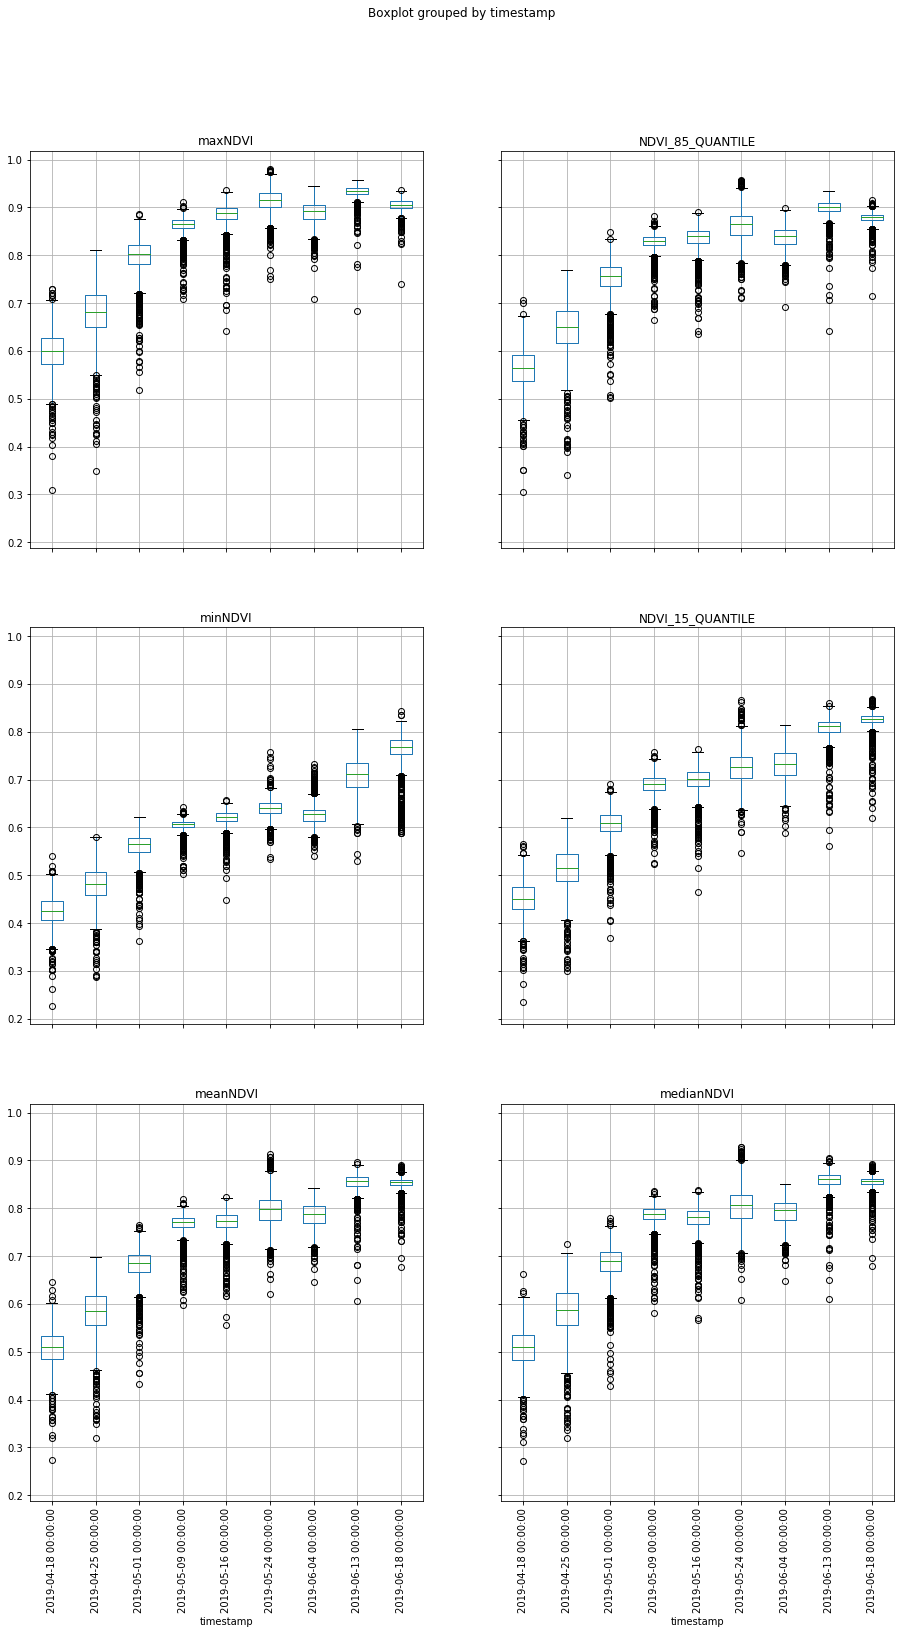

In [144]:
# Boxplot der NDVI-Werte gruppiert nach Datum
columns = ['maxNDVI', 'NDVI_85_QUANTILE', 'minNDVI', 'NDVI_15_QUANTILE', 'meanNDVI', 'medianNDVI']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDVI, Stand 21.05.2019
Es ist ersichtlich, dass die NDVI-Werte mit der Zeit im Mittel tendenziell steigen.
Statt der Max-/Min-Werte sollten eher die 15%-/85%-Quantile verwenedet werden, um Ausreisser zu vermeiden. Es ist jedoch ersichtlich, dass diese ähnlich oder fast stärker streuen als die Max-/Min-Werte. 

## NDRE

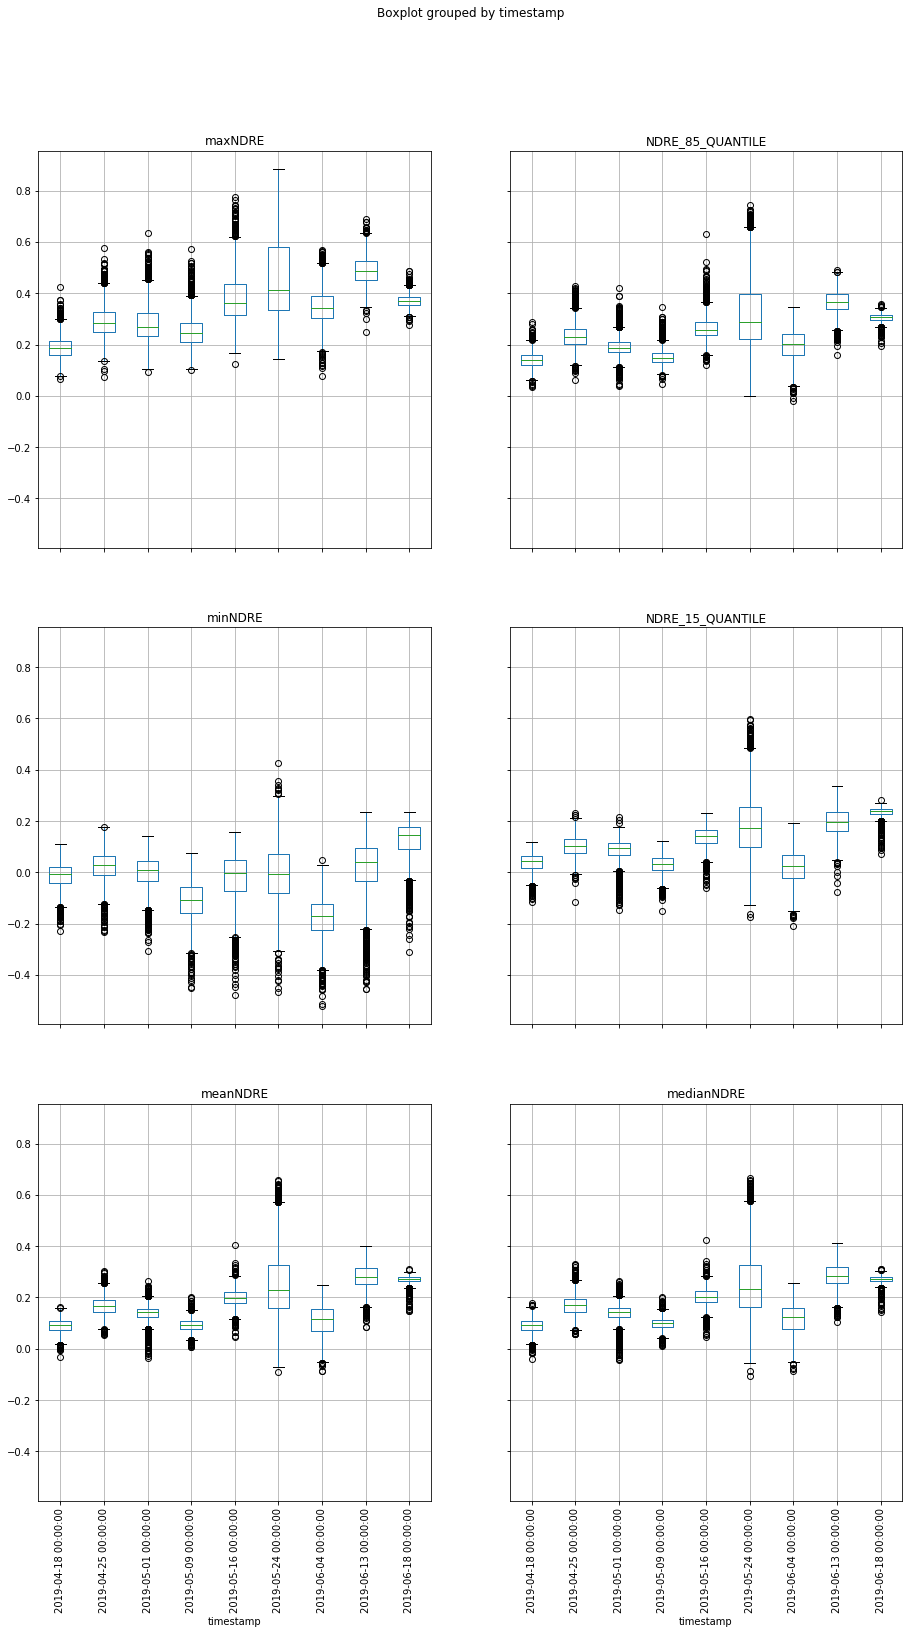

In [145]:
# Boxplot der NDRE-Werte gruppiert nach Datum
columns = ['maxNDRE', 'NDRE_85_QUANTILE', 'minNDRE', 'NDRE_15_QUANTILE', 'meanNDRE', 'medianNDRE']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDRE, Stand 21.05.2019
Bei dem NDRE-Messwerten ist ersichtlich, dass die Streuung um den Mittelwert bei den 15%-/85%-Quantilen kleiner ist als bei den Min-/Max-Werten. zudem steigen die NDRE Messwerte nicht kontinuierlich, sondern fallen und steigen wieder. Dass die unteren und oberen Werten ähnlich fallen und steigen, lässt auf eine gewisse Konsistenz in der Datenerfassung schliessen.

## Plot NDVI/NDRE
Für die allfällige Berechnung des CCCI ist ein Scatterplot mit x-Achse = NDVI und y-Achse = NDRE die Voraussetzung. Im Folgenden wird dieser mit den 85%-Quantilen und mit den Mittelwerten der Datensätze erstellt.

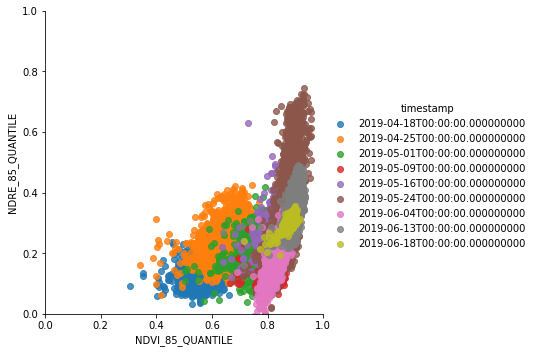

In [146]:
import seaborn as sns 
sns.lmplot(x='NDVI_85_QUANTILE', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.show()

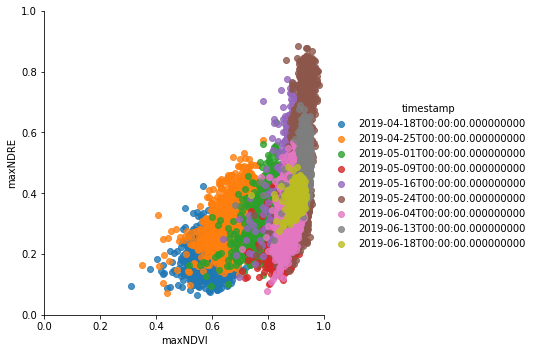

In [147]:
sns.lmplot(x='maxNDVI', y='maxNDRE', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.show()

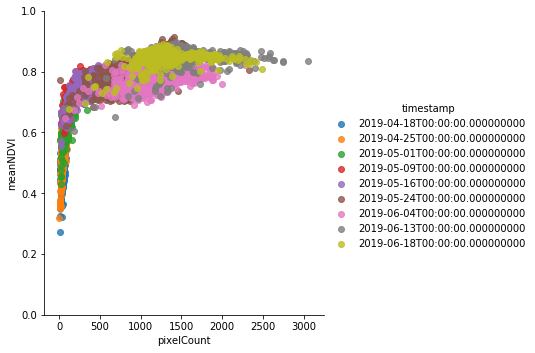

In [148]:
sns.lmplot(x='pixelCount', y='meanNDVI', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

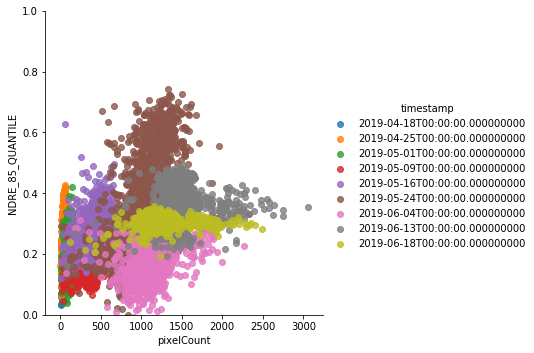

In [149]:
sns.lmplot(x='pixelCount', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

### Zwischenfazit NDVI/NDRE, Stand 21.05.2019
Wie in den Scatterplots ersichtlich ist, sind die Datenwolken nach Datum einigermassen örtlich gruppiert. Dabei treten jedoch sehr verschiedene NDRE-Werte pro Datum und auch NDVI-Wert auf. Eine lineare Beziehung NDVI->NDRE, wie sie in der Literatur (vergleiche Fachmodul) gezeigt wurde, ist nicht wirklich sichtbar. Die Berechnung des CCCI anhand dieser Daten ist momentan noch nicht vielversprechend, könnte jedoch gewagt werden. Abzuwarten ist, ob die NDRE-Werte mit der Zeit noch ansteigen, da sie mittlerweile eher tiefe Werte annehmen.

## Analyse der Erntedaten
In diesem Schritt werden die Erntedaten, dass heisst Gewicht und Zustand, in Zusammenhang mit den Messdaten (Vegetationsindizes, Wetterdaten) untersucht.<br>
Versucht wird eine Korrelation zwischen den Indizes oder dem Wetter und dem Erntegewicht zu finden. Das Erntegewicht ist hauptsächlich die Response eines potentiellen ML-Modelles, wobei auch noch der Zustand berücksichtigt werden kann. Zustände sind:<br>
* Fehlt: Brokkoli wurde bei der Ernte nicht gefunden
* Überreif
* Verkümmert: Pflanze ist fast gar nicht gewachsen und hat kleine Blätter
* Kein Kopf: Pflanze hat zwar grosse Blätter aber keinen 'Kopf' bzw. keine Blüte
* Faul
* Unreif (alle Brokkoli unter 300g)

### Korrelationen zwischen Vegetationsindizes, Pixel-Anzahl und Erntegewicht
In einem ersten Schritt wird durch verschiedene Plots versucht, eine erhoffte Korrelation der Vegetationsindizes oder der Pixel-Anzahl (gemäss Segmentierung) und dem Erntegewicht zu finden.

#### Untersuchung letzte Messung - Unverrechnete Werte
Da die Pflanzen bei der letzten Messung am 18.06.19, am Tag vor der Ernte, am weitesten entwickelt waren, wird zuerst diese Messung mit den Erntedaten verglichen.

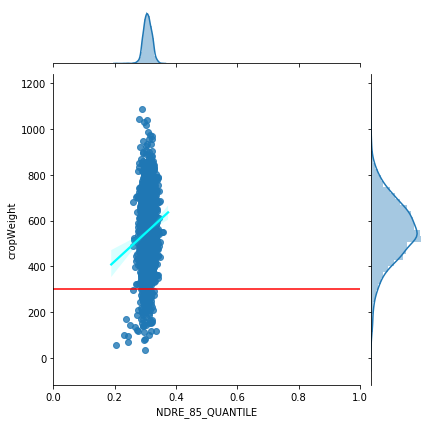

In [150]:
# Daten mit den Messwerten der letzen Messung filtern
broccoli_data_lastDate = broccoli_data[broccoli_data.timestamp == '2019-06-18']

# Scatterplot NDRE 85%-Quantil - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie, welche das Minimalgewicht für Reife darstellt
plt.axhline(y=300, color='red')

# Skala NDRE auf [0,1] setzen
axes = plt.gca()
axes.set_xlim([0,1])
plt.show()

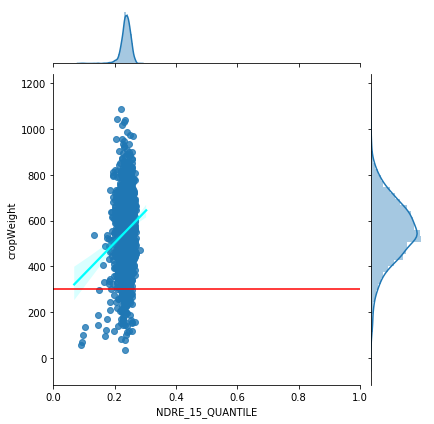

In [151]:
# Scatterplot NDRE 15%-Quantil - Gewicht
sns.jointplot(x='NDRE_15_QUANTILE', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie, welche das Minimalgewicht für Reife darstellt
plt.axhline(y=300, color='red')

# Skala NDRE auf [0,1] setzen
axes = plt.gca()
axes.set_xlim([0,1])
plt.show()

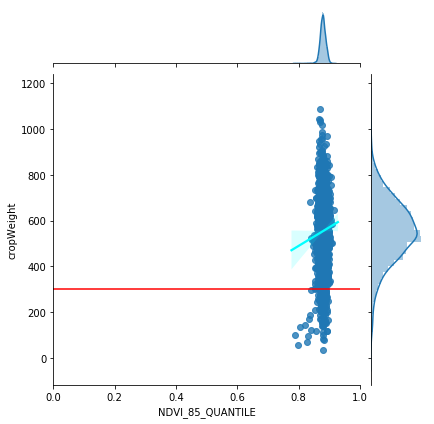

In [152]:
# Scatterplot NDVI 85%-Quantil - Gewicht
sns.jointplot(x='NDVI_85_QUANTILE', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')

# Skala NDVI auf [0,1] setzen
axes = plt.gca()
axes.set_xlim([0,1])
plt.show()

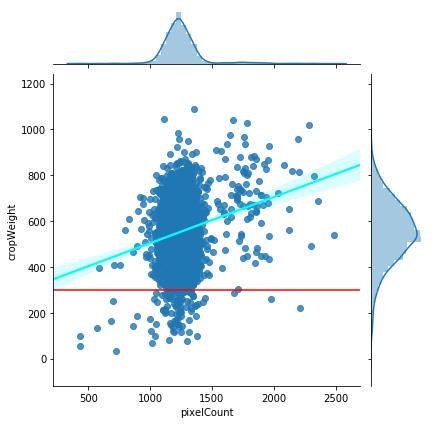

In [153]:
# Scatterplot Pixel-Anzahl - Erntegewicht
sns.jointplot(x='pixelCount', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

#### Untersuchung verrechnete Werte
Da keine ersichtliche Korrelation zwischen NDVI/NDRE/Pixel-Anzahl und Gewicht gefunden wurde, werden in diesem Schritt bestimmte Werte berechnet, die nicht nur Messwerte an einem Datum darstellen. Das kann beispielsweise die Summe des durchschnittlichen NDVI über alle Messdaten sein.

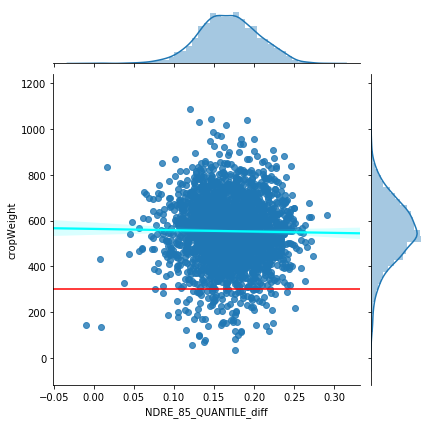

In [154]:
# Erstellung eines DataFrames zur Untersuchung der Erntedaten mit verrechneten Werten
# broccoli_data_lastDate beinhaltet zu jedem Brokkoli nur ein Datum, das DataFrame enthält zu Beginn nur Brokkoli-IDs 
# und deren Gewicht
broccoli_cropData = broccoli_data_lastDate[['id', 'cropWeight','cropMissing', 'cropOverripe', 'cropRudimentary', 'cropRotten',
                                            'cropUnripe', 'cropNoBlossom', 'rowNumber', 'NDRE_85_QUANTILE', 
                                            'NDVI_85_QUANTILE']].copy()
broccoli_cropData.rename(index=str, columns={"NDRE_85_QUANTILE": "NDRE_85_QUANTILE_lastDate", "NDVI_85_QUANTILE":
                                             "NDVI_85_QUANTILE_lastDate"}, inplace=True)


# Berechnung der Differenz des NDRE-85%-Quantils zwischen dem letzen und dem ersten Messdatum für jeden Brokkoli
broccoli_cropData = broccoli_cropData.merge(broccoli_data[broccoli_data.timestamp == '2019-06-18'][['id', 'NDRE_85_QUANTILE']], 
                                            left_on='id', right_on='id')
broccoli_cropData = broccoli_cropData.merge(broccoli_data[broccoli_data.timestamp == '2019-04-18'][['id', 'NDRE_85_QUANTILE']], 
                                            left_on='id', right_on='id', suffixes=('_0618', '_0418'))
broccoli_cropData['NDRE_85_QUANTILE_diff'] = (broccoli_cropData['NDRE_85_QUANTILE_0618'] - 
                                              broccoli_cropData['NDRE_85_QUANTILE_0418'])
broccoli_cropData.drop(['NDRE_85_QUANTILE_0618', 'NDRE_85_QUANTILE_0418'], axis=1, inplace=True)

# Scatterplot Differenz NDRE-85%-Quantil - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE_diff', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

In [155]:
# Berechnung der Summen aller Messwerte für jeden Brokkoli
broccoli_cropData = broccoli_cropData.merge(broccoli_data.drop(['lat', 'long', 'cropWeight', 'cropMissing', 'cropOverripe'
                                                               , 'cropRudimentary', 'cropRotten', 'cropUnripe','cropNoBlossom'],
                                                               axis=1).groupby(['id']).sum().add_suffix('_sum'), left_on='id',
                                            right_on='id')
broccoli_cropData.head()

,id,cropWeight,cropMissing,cropOverripe,cropRudimentary,cropRotten,cropUnripe,cropNoBlossom,rowNumber,NDRE_85_QUANTILE_lastDate,...,NDVI_75_QUANTILE_sum,NDVI_85_QUANTILE_sum,maxNDRE_sum,minNDRE_sum,meanNDRE_sum,medianNDRE_sum,NDRE_15_QUANTILE_sum,NDRE_25_QUANTILE_sum,NDRE_75_QUANTILE_sum,NDRE_85_QUANTILE_sum
0,1,NaN,0,0,1,0,0,0,2,0.234960,...,6.024333,6.165614,2.060165,-0.168202,1.104626,1.128657,0.594031,0.796224,1.456158,1.586233
1,2,NaN,0,0,0,0,1,0,1,0.244244,...,6.491165,6.653173,2.445816,-0.052966,1.179873,1.207083,0.666648,0.852718,1.502430,1.675670
2,3,NaN,0,0,0,1,0,0,2,0.249088,...,6.739554,6.882051,2.168607,0.203520,1.344681,1.385629,0.980094,1.109133,1.597043,1.707438
3,4,504.0,0,0,0,0,0,0,1,0.275040,...,6.979826,7.110945,2.551223,0.005736,1.421292,1.403219,0.975019,1.103663,1.738070,1.903032
4,5,171.0,0,0,0,0,1,0,2,0.237895,...,6.792361,6.959349,2.484260,-0.296113,1.278361,1.295557,0.787031,0.993728,1.610418,1.759785


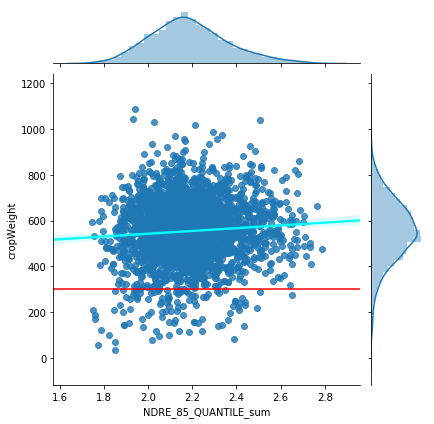

In [156]:
# Scatterplot Summe NDRE-85%-Quantil - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE_sum', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

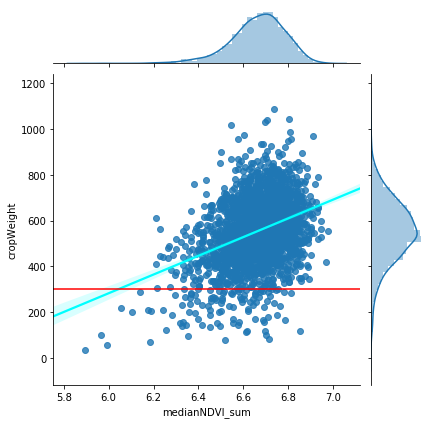

In [157]:
# Scatterplot Summe Median-NDVI - Gewicht
sns.jointplot(x='medianNDVI_sum', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

In [158]:
# Berechnung der Integrale des Median-NDVI, Median-NDRE
# x-Achse für Integration ist die Anzahl Tage seit erstem Messtag (Erster Messtag = 0) 
from scipy import integrate

# Hinzufügen der Spalten mit Initialwert 0.0
broccoli_cropData['medianNDVI_Integral'] = 0.0
broccoli_cropData['medianNDRE_Integral'] = 0.0
broccoli_cropData['pixelCount_Integral'] = 0.0

# x-Werte für Integration (Tage seit erstem Messdatum)
x = [0, 7, 13, 21, 28, 36, 47, 56, 62]

# Berechnung der Integrale für jeden Brokkoli
for index, row in broccoli_cropData.iterrows():
    #if(len(broccoli_data[broccoli_data.id==row['id']]['medianNDVI'].to_numpy()) == 9):
    broccoli_cropData.at[index, 'medianNDVI_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['medianNDVI'].to_numpy(), x=x, initial=0)[8]
    broccoli_cropData.at[index, 'medianNDRE_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['medianNDRE'].to_numpy(), x=x, initial=0)[8]
    broccoli_cropData.at[index, 'pixelCount_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['pixelCount'].to_numpy(), x=x, initial=0)[8]

broccoli_cropData.head()

,id,cropWeight,cropMissing,cropOverripe,cropRudimentary,cropRotten,cropUnripe,cropNoBlossom,rowNumber,NDRE_85_QUANTILE_lastDate,...,minNDRE_sum,meanNDRE_sum,medianNDRE_sum,NDRE_15_QUANTILE_sum,NDRE_25_QUANTILE_sum,NDRE_75_QUANTILE_sum,NDRE_85_QUANTILE_sum,medianNDVI_Integral,medianNDRE_Integral,pixelCount_Integral
0,1,NaN,0,0,1,0,0,0,2,0.234960,...,-0.168202,1.104626,1.128657,0.594031,0.796224,1.456158,1.586233,39.498240,7.480815,11973.5
1,2,NaN,0,0,0,0,1,0,1,0.244244,...,-0.052966,1.179873,1.207083,0.666648,0.852718,1.502430,1.675670,42.754094,8.320008,22663.5
2,3,NaN,0,0,0,1,0,0,2,0.249088,...,0.203520,1.344681,1.385629,0.980094,1.109133,1.597043,1.707438,44.884187,9.459704,15727.5
3,4,504.0,0,0,0,0,0,0,1,0.275040,...,0.005736,1.421292,1.403219,0.975019,1.103663,1.738070,1.903032,46.415482,9.653869,36590.5
4,5,171.0,0,0,0,0,1,0,2,0.237895,...,-0.296113,1.278361,1.295557,0.787031,0.993728,1.610418,1.759785,45.025790,8.924524,26249.5


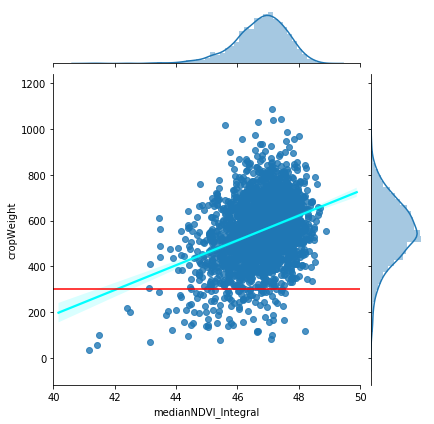

In [159]:
# Scatterplot Integral Median-NDVI - Gewicht
sns.jointplot(x='medianNDVI_Integral', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Skala Integral NDVI auf [40,50] setzen
axes = plt.gca()
axes.set_xlim([40,50])

# Horizontale Line für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()

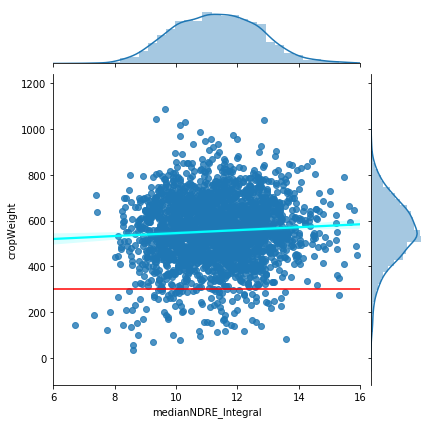

In [160]:
# Scatterplot Integral Median-NDRE - Gewicht
sns.jointplot(x='medianNDRE_Integral', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Skala Integral NDRE auf 6,16] setzen
axes = plt.gca()
axes.set_xlim([6,16])

# Horizontale Linie für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()

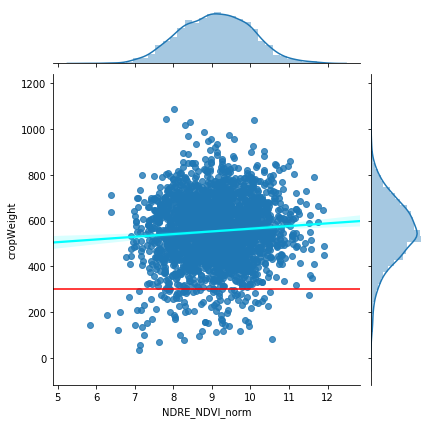

In [161]:
# Verrechnung NDVI/NDRE Integrale
broccoli_cropData['NDRE_NDVI_norm'] = ((broccoli_cropData['medianNDRE_Integral'] * broccoli_cropData['medianNDVI_Integral'])
                                       / (broccoli_cropData['medianNDRE_Integral'] + broccoli_cropData['medianNDVI_Integral']))

# Scatterplot Verrechnung NDVI/NDRE Integrale - Gewicht
sns.jointplot(x='NDRE_NDVI_norm', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()


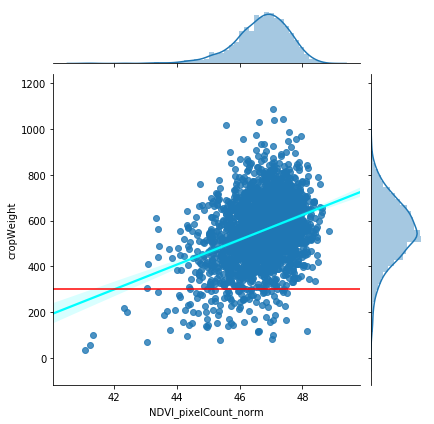

In [162]:
# Verrechnung NDVI/Pixel-Anzahl
broccoli_cropData['NDVI_pixelCount_norm'] = ((broccoli_cropData['pixelCount_Integral'] * broccoli_cropData['medianNDVI_Integral'])
                                       / (broccoli_cropData['pixelCount_Integral'] + broccoli_cropData['medianNDVI_Integral']))

# Scatterplot Verrechnung NDVI/Pixel-Anzahl - Gewicht
sns.jointplot(x='NDVI_pixelCount_norm', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()

#### Analyse unreifer, schadhafter Brokkoli
Nun werden noch die unreifen und schadhaften (d.h. eines der Ernte Labels wurde gesetzt) untersucht. Allenfalls können Ausreisser bei der Pixel-Anzahl/NDVI/NDRE auf einen schadhaften Zustand bei der Ernte hinweisen.<br>
Wie oben erwähnt sind die Labels:<br>
* Fehlt: Brokkoli wurde bei der Ernte nicht gefunden
* Überreif
* Verkümmert: Pflanze ist fast gar nicht gewachsen und hat kleine Blätter
* Kein Kopf: Pflanze hat zwar grosse Blätter aber keinen 'Kopf' bzw. keine Blüte
* Faul
* Unreif (alle Brokkoli unter 300g)

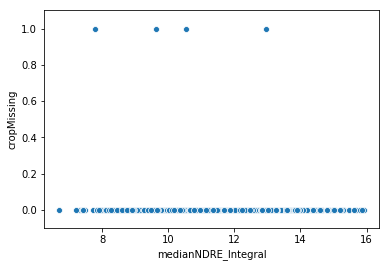

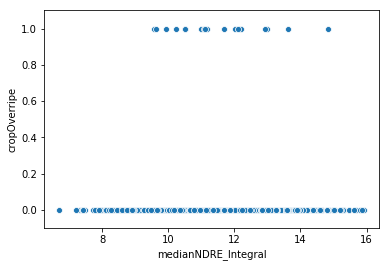

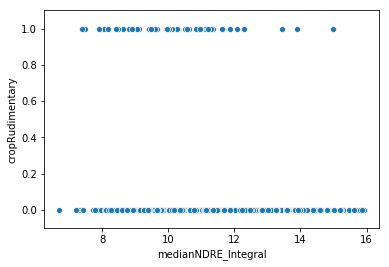

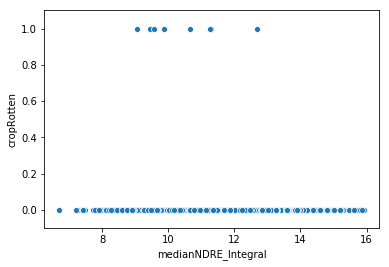

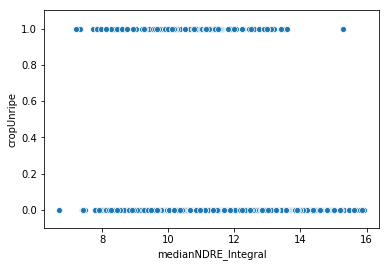

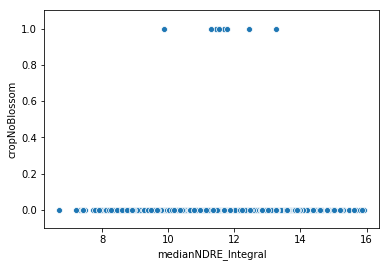

In [163]:
# Scatterplots Median-NDRE-Integral - Erntelabels
columnsCropLabels = ['cropMissing', 'cropOverripe', 'cropRudimentary', 'cropRotten', 'cropUnripe', 'cropNoBlossom']
for column in columnsCropLabels:    
    sns.scatterplot(x='medianNDRE_Integral', y=column, data=broccoli_cropData)
    axes = plt.gca()
    axes.set_ylim([-0.1,1.1])    
    plt.show()

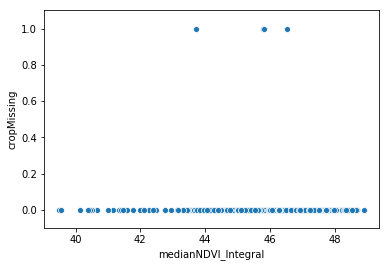

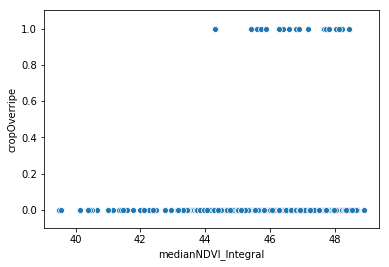

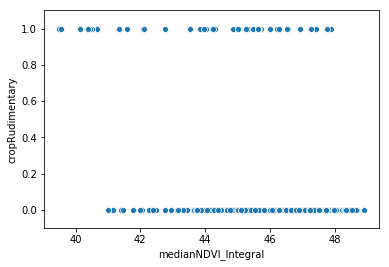

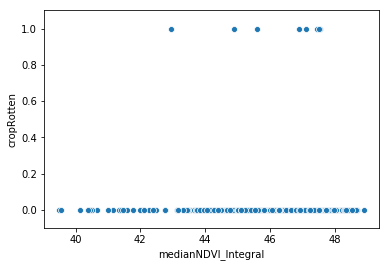

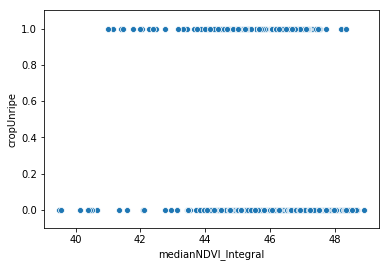

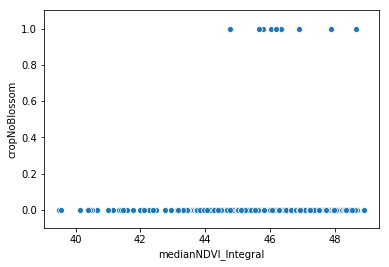

In [164]:
# Scatterplots Median-NDVI-Integral - Erntelabels
for column in columnsCropLabels:    
    sns.scatterplot(x='medianNDVI_Integral', y=column, data=broccoli_cropData)
    axes = plt.gca()
    axes.set_ylim([-0.1,1.1])    
    plt.show()

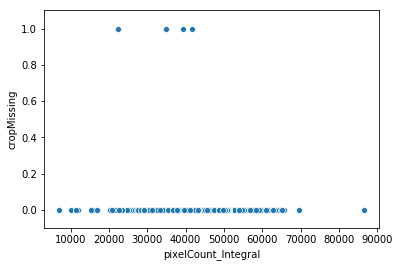

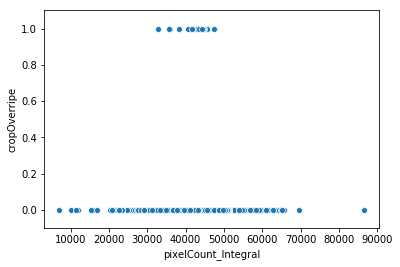

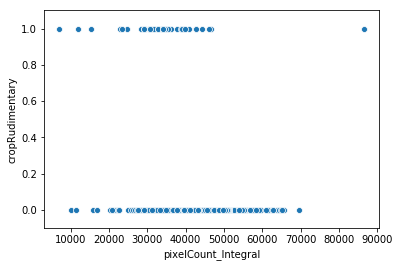

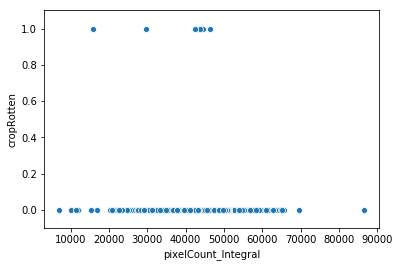

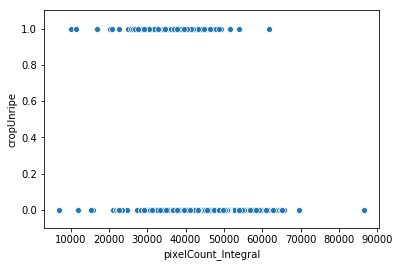

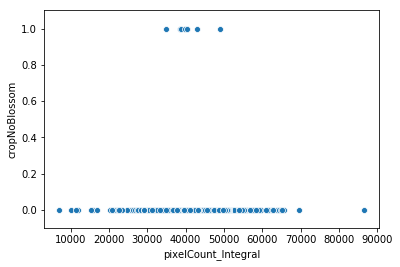

In [165]:
# Scatterplots Pixel-Anzahl-Integral - Erntelabels
for column in columnsCropLabels:    
    sns.scatterplot(x='pixelCount_Integral', y=column, data=broccoli_cropData)
    axes = plt.gca()
    axes.set_ylim([-0.1,1.1])    
    plt.show()

#### Korrelationsmatrix berrechnete Werte, Erntelabels
Um allfällige Korrelationen besser zu erkennen, wird im folgenden eine Korrelationsmatrix aufgrund des DataFrame mit den Erntelabels und den berechneten Werten erstellt.

<Figure size 432x288 with 0 Axes>

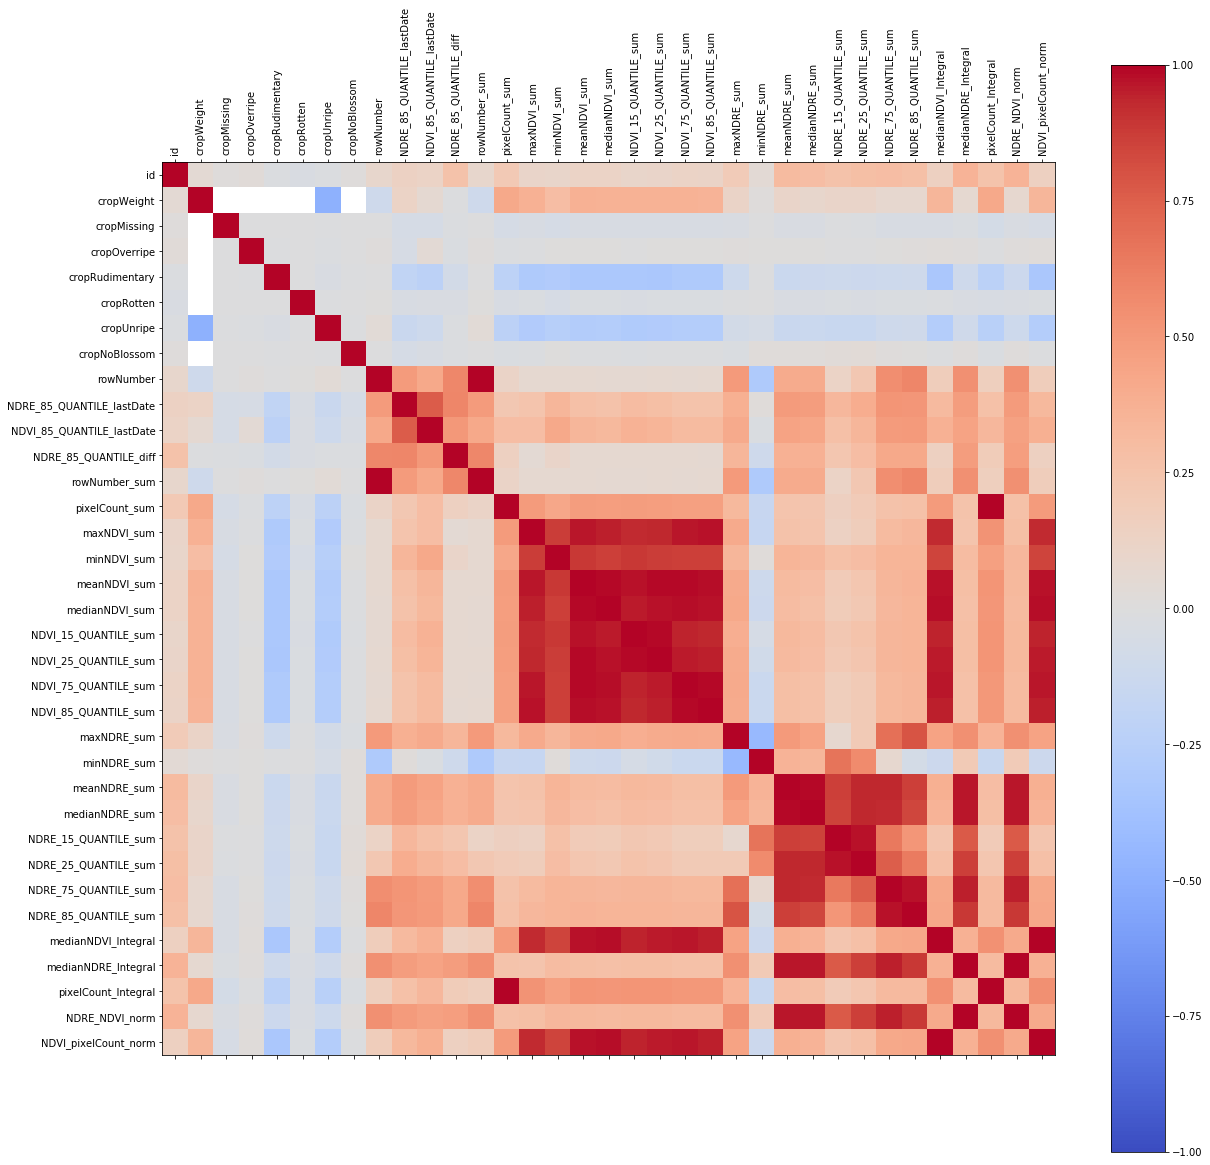

In [184]:
# Korrelationsmatrix erstellen
corr = broccoli_cropData.corr()

# Grafik modifizieren
fig = plt.figure()
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(broccoli_cropData.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(broccoli_cropData.columns)
ax.set_yticklabels(broccoli_cropData.columns)

plt.show()

#### Fazit Korrelationsmatrix berechnete Werte, Erntelabels
Die berechneten Werte korrelieren natürlich untereinander stark, dies führt jedoch zu keiner Aussage. Desweiteren sind keine sehr starken Korrelationen mit dem Gewicht / den Erntelabels und den Messwerten zu sehen. Weniger starke Korrelationen sind zu erkennen zwischen:<br>
* cropWeight (Gewicht) - pixelCount (Pixel-Anzahl)
* cropWeight (Gewicht) - (Berechnete) NDVI-Werte
* Negative Korrelation: cropRudimentary (Verkümmert) - (Berechnete) NDVI-Werte
* Negative Korrelation: cropUnripe (Unreif) - (Berechnete) NDVI-Werte

In [167]:
# Aufteilung der Daten in reife, unreife (Gewicht < 300g) Brokkoli
broccoli_data_lastDate_unripe = broccoli_data_lastDate[broccoli_data_lastDate.cropWeight < 300]
broccoli_data_lastDate_ripe = broccoli_data_lastDate[broccoli_data_lastDate.cropWeight >= 300]

print("Anzahl unreife Brokkoli (Gewicht < 300g): " + str(len(broccoli_data_lastDate_unripe)))
print("Durchschnitt meanNDVI unreife: " + str(broccoli_data_lastDate_unripe['meanNDVI'].mean()))
print("Durchschnitt meanNDRE unreife: " + str(broccoli_data_lastDate_unripe['meanNDRE'].mean()))
print("Durchschnitt medianNDRE unreife: " + str(broccoli_data_lastDate_unripe['medianNDRE'].mean()))
print("Durchschnitt NDRE_85_QUANTILE unreife: " + str(broccoli_data_lastDate_unripe['NDRE_85_QUANTILE'].mean()))
print("Durchschnitt NDRE_15_QUANTILE unreife: " + str(broccoli_data_lastDate_unripe['NDRE_15_QUANTILE'].mean()))
print()
print("Anzahl reife Brokkoli (Gewicht >= 300g): " + str(len(broccoli_data_lastDate_ripe)))
print("Durchschnitt meanNDVI reife: " + str(broccoli_data_lastDate_ripe['meanNDVI'].mean()))
print("Durchschnitt meanNDRE reife: " + str(broccoli_data_lastDate_ripe['meanNDRE'].mean()))
print("Durchschnitt medianNDRE reife: " + str(broccoli_data_lastDate_ripe['medianNDRE'].mean()))
print("Durchschnitt NDRE_85_QUANTILE reife: " + str(broccoli_data_lastDate_ripe['NDRE_85_QUANTILE'].mean()))
print("Durchschnitt NDRE_15_QUANTILE reife: " + str(broccoli_data_lastDate_ripe['NDRE_15_QUANTILE'].mean()))

Anzahl unreife Brokkoli (Gewicht < 300g): 104
Durchschnitt meanNDVI unreife: 0.8450511291188434
Durchschnitt meanNDRE unreife: 0.25942563849601424
Durchschnitt medianNDRE unreife: 0.261170555335971
Durchschnitt NDRE_85_QUANTILE unreife: 0.29828873858428917
Durchschnitt NDRE_15_QUANTILE unreife: 0.22194648433046846

Anzahl reife Brokkoli (Gewicht >= 300g): 2323
Durchschnitt meanNDVI reife: 0.8534275279849725
Durchschnitt meanNDRE reife: 0.2717777237862073
Durchschnitt medianNDRE reife: 0.27268228562828595
Durchschnitt NDRE_85_QUANTILE reife: 0.3075699226690991
Durchschnitt NDRE_15_QUANTILE reife: 0.23725628850855707


### Analyse der Reihen
Nun werden noch die 6 Testreihen untersucht, d.h. miteinander verglichen. Allenfalls zeichnet sich ein Bild ab, dass gewisse Reihen mehr/weniger Ertrag bringen.

In [191]:
broccoli_cropData_ByRow = broccoli_cropData[['rowNumber', 'cropWeight', 'cropMissing', 'cropOverripe', 'cropRudimentary',
                                           'cropRotten', 'cropUnripe', 'cropNoBlossom', 'NDRE_85_QUANTILE_lastDate',
                                          'NDVI_85_QUANTILE_lastDate']].groupby(['rowNumber'], as_index=False).sum() \
                                            .add_suffix('_sum')
broccoli_cropData_ByRow.rename(index=str, columns={"rowNumber_sum": "rowNumber"}, inplace=True)
broccoli_cropData_ByRow

,rowNumber,cropWeight_sum,cropMissing_sum,cropOverripe_sum,cropRudimentary_sum,cropRotten_sum,cropUnripe_sum,cropNoBlossom_sum,NDRE_85_QUANTILE_lastDate_sum,NDVI_85_QUANTILE_lastDate_sum
0,1,242101.0,0,4,7,1,13,2,129.183802,378.190465
1,2,224253.0,2,2,9,2,27,0,122.483400,363.057550
2,3,251100.0,0,1,7,0,15,1,139.368248,396.175415
3,4,192549.0,1,3,10,2,23,5,126.287670,360.869684
4,5,212507.0,1,6,10,2,25,1,131.882515,374.255487
5,6,222137.0,0,3,4,1,25,0,130.025775,361.826897


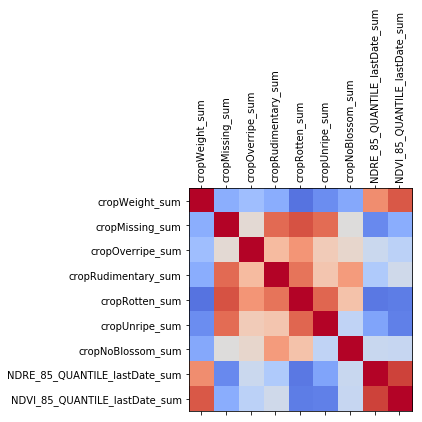

In [196]:
# Korrelationsmatrix nach Reihe (in Feld)
plt.matshow(broccoli_cropData_ByRow.drop('rowNumber', axis=1).corr(), cmap='coolwarm', vmin=-1, vmax=1)

# Achsenbeschriftungen (Ticks) setzen
ax = plt.gca()
ticks = np.arange(0,len(broccoli_cropData_ByRow.drop('rowNumber', axis=1).columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(broccoli_cropData_ByRow.drop('rowNumber', axis=1).columns)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_yticklabels(broccoli_cropData_ByRow.drop('rowNumber', axis=1).columns)

plt.show()

In [198]:
broccoli_cropData_ByRow.drop('rowNumber', axis=1).corr()['NDVI_85_QUANTILE_lastDate_sum']

cropWeight_sum                   0.775026
cropMissing_sum                 -0.507900
cropOverripe_sum                -0.228059
cropRudimentary_sum             -0.100861
cropRotten_sum                  -0.766678
cropUnripe_sum                  -0.757218
cropNoBlossom_sum               -0.159566
NDRE_85_QUANTILE_lastDate_sum    0.858762
NDVI_85_QUANTILE_lastDate_sum    1.000000
Name: NDVI_85_QUANTILE_lastDate_sum, dtype: float64

## Meteomatics Daten

In [75]:
# Abfrage definieren und ausführen: Alle Meteomatics-Daten
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
SQL_Query = pd.read_sql_query('SELECT * FROM dbo.meteomatics', cnxn)
meteomatics_data = pd.DataFrame(SQL_Query)
cnxn.close()

meteomatics_data.head()

,timestamp,temperature,relativeHumidity,absoluteHumidity,dewPoint,wind,cloudCover,precipitation,precipitationType,precipitationProbability,hail,evaporation,frostDepth,radiation,accumulatedEnergy,evapotranspiration,growingDegreeDays,leafWetness
0,2019-04-08 09:00:00.243,7.4,93.800003,7.5,6.5,1.5,100.000000,0.10,0.0,5.7,0.0,-0.04,0.0,337.299988,59040.500000,0.04,NaN,1.0
1,2019-04-08 07:56:07.257,7.0,93.900002,7.3,6.1,0.4,99.000000,0.04,0.0,1.0,0.0,-0.01,0.0,126.000000,40193.898438,0.00,NaN,1.0
2,2019-04-08 07:56:37.323,7.0,93.900002,7.3,6.1,0.4,99.000000,0.04,0.0,1.0,0.0,-0.01,0.0,126.000000,40193.898438,0.00,NaN,1.0
3,2019-04-08 10:00:00.207,7.8,94.199997,7.7,7.0,0.8,100.000000,0.03,0.0,1.0,0.0,-0.09,0.0,529.599976,19428.500000,0.06,NaN,1.0
4,2019-04-08 14:00:00.203,11.2,68.800003,7.0,5.7,1.6,97.599998,0.00,0.0,1.0,0.0,-0.17,0.0,848.700012,856912.625000,0.25,0.0,0.0


In [76]:
# Aggregieren der Meteomatics-Daten zwischen den Messzeitpunkten
# Datum eine Woche vor erstem Messdatum hinzufügen -> Wetterdaten-Aggregation bis zu diesem Zeitpunkt
i = 0
meteomatics_aggregates = pd.DataFrame()
dates_Meteomatics =['2019-04-11'] + dates
while i < (len(dates_Meteomatics) - 1):
    weekly_data = meteomatics_data[((meteomatics_data.timestamp > dates_Meteomatics[i]) & (meteomatics_data.timestamp < dates_Meteomatics[i+1]))][['temperature', 'precipitation', 'radiation', 'relativeHumidity', 'wind', 'cloudCover']]
    weekly_data_agg = pd.DataFrame(weekly_data.agg(['mean']))
    weekly_data_agg['dateFrom'] = dates_Meteomatics[i]
    weekly_data_agg['dateTo'] = dates_Meteomatics[i+1]
    weekly_data_agg['index'] = i
    weekly_data_agg.set_index(['index'], inplace=True)
    meteomatics_aggregates = pd.concat([meteomatics_aggregates, weekly_data_agg], axis=0)
    
    i = i + 1
    
display(meteomatics_aggregates)

,temperature,precipitation,radiation,relativeHumidity,wind,cloudCover,dateFrom,dateTo
index,,,,,,,,
0,8.167262,0.019762,288.023810,78.371428,2.136905,73.358929,2019-04-11,2019-04-18
1,15.263095,0.006429,305.483928,46.720833,5.640476,23.620238,2019-04-18,2019-04-25
2,9.009722,0.193681,320.585417,75.047222,3.323611,84.314583,2019-04-25,2019-05-01
3,8.699476,0.117068,336.826703,72.542408,2.657068,68.918325,2019-05-01,2019-05-09
4,9.201190,0.157500,348.977976,72.144048,4.416667,61.736310,2019-05-09,2019-05-16
5,11.502604,0.323594,360.567709,81.632813,2.378125,75.412500,2019-05-16,2019-05-24
6,15.044867,0.064183,370.204183,75.316350,1.838783,54.486692,2019-05-24,2019-06-04
7,16.870233,0.341620,379.955093,72.488372,2.853488,58.016279,2019-06-04,2019-06-13
8,17.698333,0.034000,382.963335,73.420833,2.380833,56.290000,2019-06-13,2019-06-18


In [77]:
broccoli_data_aggregates = pd.DataFrame()
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date][['meanNDVI', 'NDRE_85_QUANTILE', 'pixelCount']]
    broccoli_data_byDate_agg = pd.DataFrame(broccoli_data_byDate.agg(['mean']))
    broccoli_data_byDate_agg = broccoli_data_byDate_agg.add_prefix('meanAgg_')
    broccoli_data_byDate_agg['date'] = date
    #weekly_data_agg.set_index(['index'], inplace=True)
    broccoli_data_aggregates = pd.concat([broccoli_data_aggregates, broccoli_data_byDate_agg], axis=0)
    
display(broccoli_data_aggregates)

,meanAgg_meanNDVI,meanAgg_NDRE_85_QUANTILE,meanAgg_pixelCount,date
mean,0.508310,0.138751,37.410145,2019-04-18
mean,0.583120,0.234079,46.112466,2019-04-25
mean,0.682567,0.193679,125.839953,2019-05-01
mean,0.766804,0.152841,337.265041,2019-05-09
mean,0.770621,0.264955,451.688950,2019-05-16
mean,0.795307,0.326153,992.890287,2019-05-24
mean,0.785706,0.198119,1147.355879,2019-06-04
mean,0.854168,0.367132,1455.834841,2019-06-13
mean,0.852384,0.306422,1245.759733,2019-06-18


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D104198D0>,
      dtype=object)

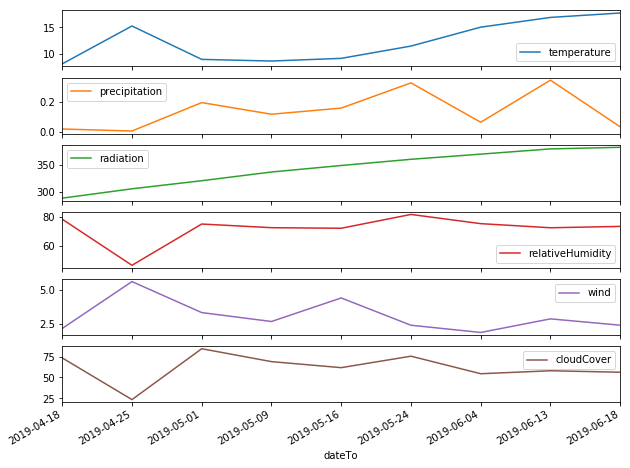

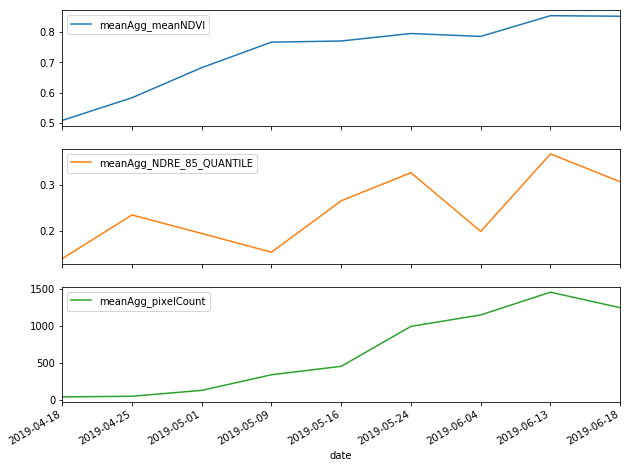

In [78]:
#plt.plot(broccoli_data_aggregates['date'],broccoli_data_aggregates[['meanNDVI']])
#plt.plot(meteomatics_aggregates['dateTo'],meteomatics_aggregates[['temperature', 'relativeHumidity','precipitation']])
#plt.show

meteomatics_aggregates.plot.line(x='dateTo', subplots=True, figsize=(10,8))
broccoli_data_aggregates.plot.line(x='date', subplots=True, figsize=(10,8))

In [79]:
meteomatics_data_reindexed = meteomatics_data.copy()
meteomatics_data_reindexed['timestamp'] = pd.to_datetime(meteomatics_data_reindexed['timestamp'])
meteomatics_data_reindexed.set_index("timestamp", drop=True, inplace=True)

tmp_weather = meteomatics_data_reindexed.resample('D').median()
tmp_weather = tmp_weather.add_prefix('median_')

tmp_weather_sum = meteomatics_data_reindexed.resample('D').sum()
tmp_weather['sum_precipitation'] = tmp_weather_sum['precipitation']
tmp_weather['sum_accumulatedEnergy'] = tmp_weather_sum['accumulatedEnergy']

print(tmp_weather.shape)
tmp_weather.describe()

(79, 19)


,median_temperature,median_relativeHumidity,median_absoluteHumidity,median_dewPoint,median_wind,median_cloudCover,median_precipitation,median_precipitationType,median_precipitationProbability,median_hail,median_evaporation,median_frostDepth,median_radiation,median_accumulatedEnergy,median_evapotranspiration,median_growingDegreeDays,median_leafWetness,sum_precipitation,sum_accumulatedEnergy
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.0,79.000000,79.000000,79.000000,66.000000,79.00000,79.000000,7.900000e+01
mean,12.860760,73.849367,8.463291,8.059494,2.512658,62.154430,0.051203,0.056962,3.239241,0.0,-0.038861,0.0,172.000000,165654.119448,0.066899,125.734849,0.28481,3.807215,1.144644e+07
std,4.487880,14.347224,2.460544,4.372760,1.973144,41.253992,0.191768,0.226276,8.988749,0.0,0.025720,0.0,64.405373,221199.127293,0.046886,90.330122,0.43621,8.285015,9.370971e+06
min,4.350000,34.100000,4.800000,0.250000,0.850000,0.000000,0.000000,0.000000,1.000000,0.0,-0.095000,0.0,0.000000,0.000000,-0.015000,0.000000,0.00000,0.000000,5.130390e+04
25%,8.800000,64.949999,6.500000,4.675000,1.400000,17.925000,0.000000,0.000000,1.000000,0.0,-0.062500,0.0,118.625003,4266.575073,0.032500,56.925001,0.00000,0.000000,2.522316e+06
50%,12.200000,77.750000,8.050000,7.750000,1.750000,86.299999,0.000000,0.000000,1.000000,0.0,-0.030000,0.0,186.500000,42245.249023,0.060000,91.899998,0.00000,0.410000,8.892922e+06
75%,15.625000,84.375000,10.250000,11.600000,2.850000,100.000000,0.005000,0.000000,1.000000,0.0,-0.020000,0.0,230.125004,258714.304688,0.090000,195.324997,0.75000,3.835000,2.035811e+07
max,21.650001,99.600002,15.200000,17.800000,10.700000,100.000000,1.105000,1.000000,52.900000,0.0,0.000000,0.0,316.199997,711136.062500,0.215000,331.600006,1.00000,49.360000,2.739155e+07


In [80]:
broccoli_data_reindexed = broccoli_data.copy()
broccoli_data_reindexed['timestamp'] = pd.to_datetime(broccoli_data_reindexed['timestamp'])
broccoli_data_reindexed.set_index("timestamp", drop=True, inplace=True)

tmp_broccoli = broccoli_data_reindexed.resample('D').median()
tmp_broccoli.drop(['id', 'lat', 'long'], axis=1, inplace=True)
tmp_broccoli = tmp_broccoli.add_prefix('median_')
#tmp_broccoli.dropna(axis=0, inplace=True)

print(tmp_broccoli.shape)
tmp_broccoli.head()

(62, 24)


,median_cropWeight,median_cropMissing,median_cropOverripe,median_cropRudimentary,median_cropRotten,median_cropUnripe,median_cropNoBlossom,median_pixelCount,median_maxNDVI,median_minNDVI,...,median_NDVI_75_QUANTILE,median_NDVI_85_QUANTILE,median_maxNDRE,median_minNDRE,median_meanNDRE,median_medianNDRE,median_NDRE_15_QUANTILE,median_NDRE_25_QUANTILE,median_NDRE_75_QUANTILE,median_NDRE_85_QUANTILE
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-18,555.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.600231,0.425229,...,0.547799,0.563648,0.187688,-0.006417,0.092238,0.092535,0.044927,0.062386,0.122096,0.137852
2019-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
weather_broccoli_daily = pd.concat([tmp_weather, tmp_broccoli], axis=1)
weather_broccoli_daily = weather_broccoli_daily.interpolate(method='linear')
weather_broccoli_daily = weather_broccoli_daily.drop(columns=['median_hail','median_frostDepth'])
print(weather_broccoli_daily.shape)
weather_broccoli_daily

(79, 41)


,median_temperature,median_relativeHumidity,median_absoluteHumidity,median_dewPoint,median_wind,median_cloudCover,median_precipitation,median_precipitationType,median_precipitationProbability,median_evaporation,...,median_NDVI_75_QUANTILE,median_NDVI_85_QUANTILE,median_maxNDRE,median_minNDRE,median_meanNDRE,median_medianNDRE,median_NDRE_15_QUANTILE,median_NDRE_25_QUANTILE,median_NDRE_75_QUANTILE,median_NDRE_85_QUANTILE
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-08,9.650000,75.300003,7.25,6.05,1.00,99.000000,0.000,0.0,1.000000,-0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,8.750000,88.899998,7.90,7.35,0.90,100.000000,0.000,0.0,1.000000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-10,8.600000,96.599998,8.30,8.05,1.25,100.000000,0.000,0.0,1.000000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-11,8.450000,82.149998,7.05,5.80,2.55,100.000000,0.000,0.0,1.000000,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-12,6.300000,85.500000,6.40,4.15,1.15,100.000000,0.000,0.0,1.000000,-0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-13,5.950000,83.650002,5.80,2.85,1.75,97.450001,0.000,0.0,1.000000,-0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-14,4.900000,91.149998,5.90,2.90,1.90,100.000000,0.005,0.0,1.000000,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,7.850000,75.200001,6.15,3.55,0.85,5.050000,0.000,0.0,1.000000,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,10.500000,59.750000,6.50,4.80,3.50,74.549999,0.000,0.0,1.000000,-0.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


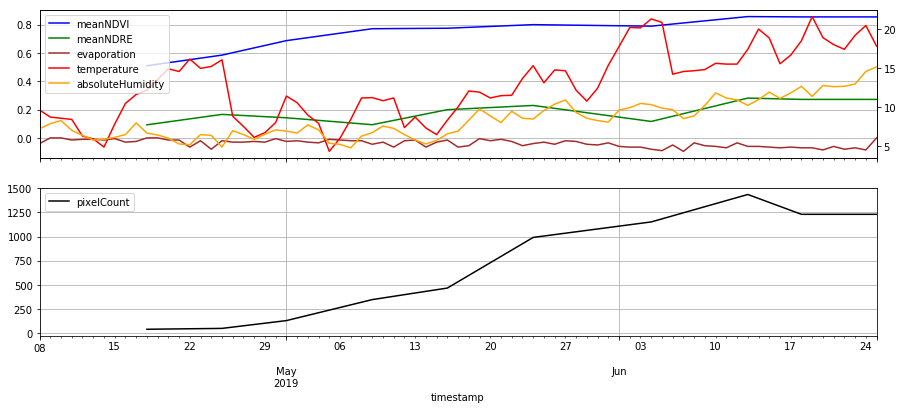

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.xlabel('meanNDVI vs. temperature')

ax1 = weather_broccoli_daily['median_meanNDVI'].plot(color='blue', grid=True, label='meanNDVI')
ax3 = weather_broccoli_daily['median_meanNDRE'].plot(color='green', grid=True, label='meanNDRE', sharey=ax1)

ax2 = weather_broccoli_daily['median_temperature'].plot(color='red', grid=True, secondary_y=True, label='temperature')
ax4 = weather_broccoli_daily['median_absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity',
                                                      sharey=ax2)
ax6 = weather_broccoli_daily['median_evaporation'].plot(color='brown', grid=True, label='evaporation',
                                                      sharey=ax2)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.subplot(2,1,2)
ax5 = weather_broccoli_daily['median_pixelCount'].plot(color='black', grid=True, secondary_y=False, label='pixelCount')

h5, l5 = ax5.get_legend_handles_labels()

plt.legend(h5, l5, loc=2)

plt.show()

In [83]:
#weather_broccoli_daily.plot(x='median_pixelCount', y=['median_meanNDRE','median_meanNDVI'])

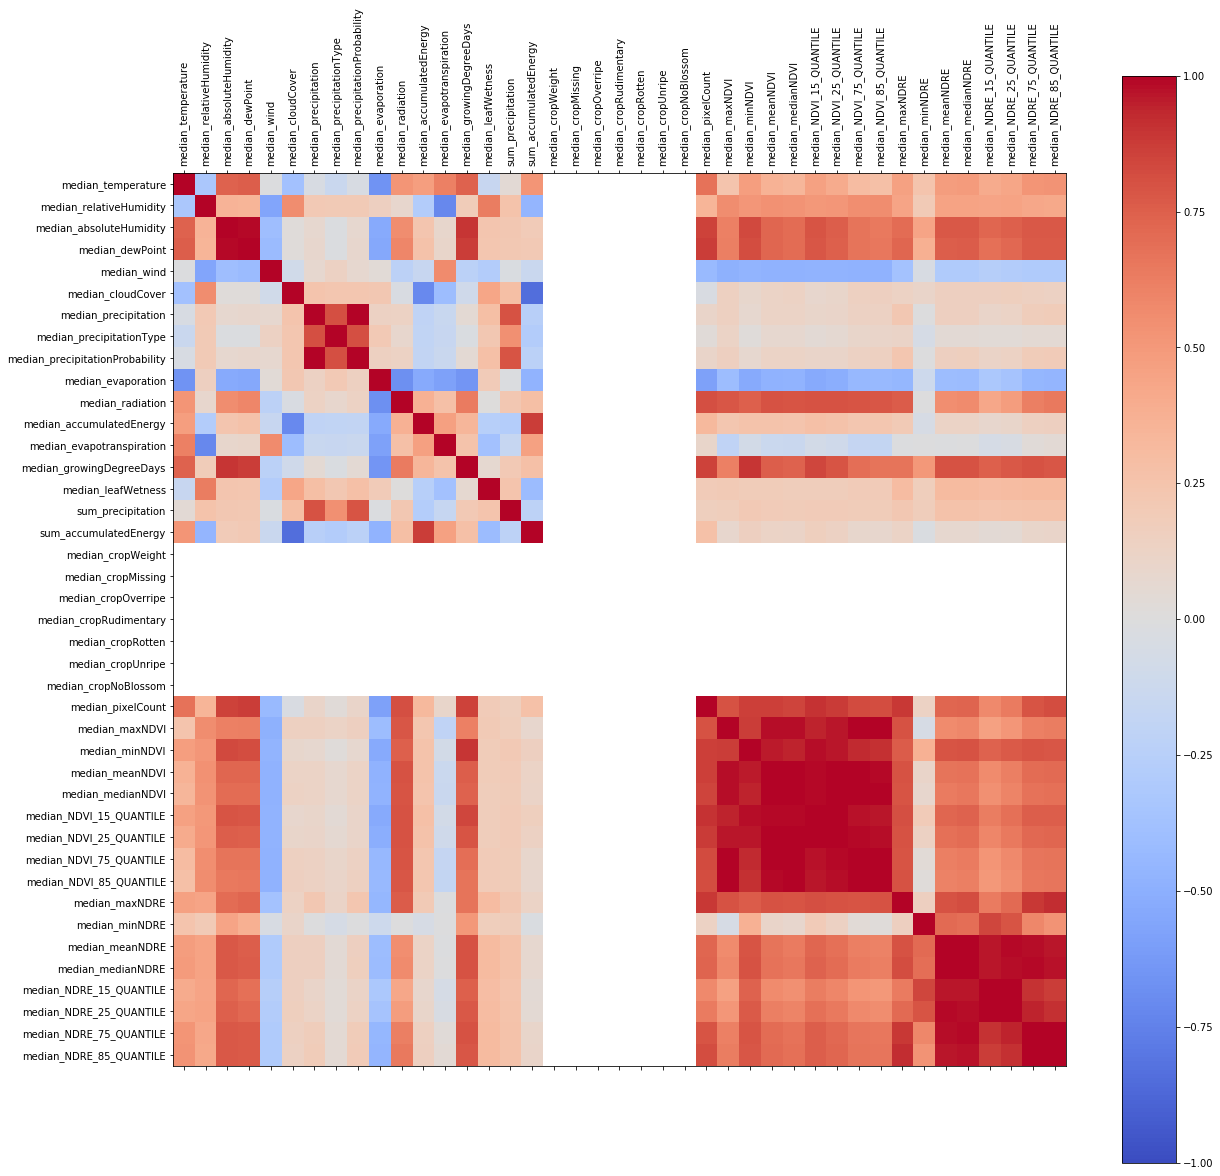

In [84]:
corr = weather_broccoli_daily.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(weather_broccoli_daily.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(weather_broccoli_daily.columns)
ax.set_yticklabels(weather_broccoli_daily.columns)
plt.show()

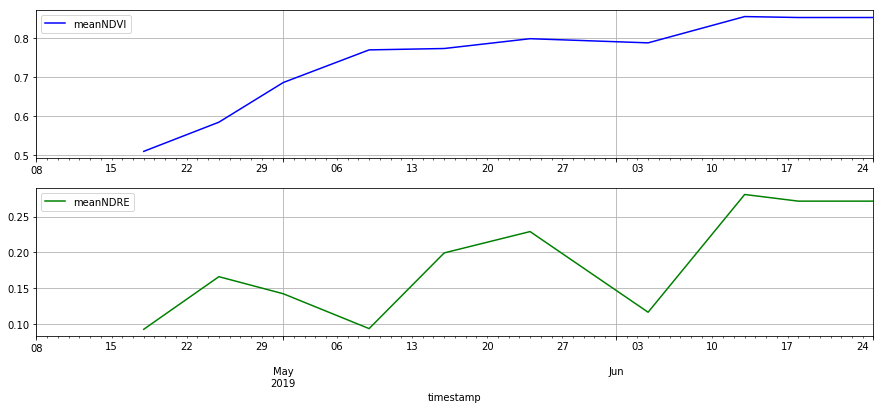

In [85]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.xlabel('meanNDVI, meanNDRE vs. temperature')

ax1 = weather_broccoli_daily['median_meanNDVI'].plot(color='blue', grid=True, label='meanNDVI')

#ax2 = weather_broccoli_daily['relativeHumidity'].plot(color='red', grid=True, secondary_y=True, label='relativeHumidity', sharey=ax2)
#ax4 = weather_broccoli_daily['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax2)
#ax5 = weather_broccoli_daily['dewPoint'].plot(color='green', grid=True, secondary_y=True, label='dewPoint', sharey=ax2)
#ax6 = weather_broccoli_daily['radiation'].plot(color='violet', grid=True, secondary_y=True, label='radiation', sharey=ax2)
#ax7 = weather_broccoli_daily['growingDegreeDays'].plot(color='black', grid=True, secondary_y=False, label='growingDegreeDays', sharey=ax2)

h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.subplot(2,1,2)
ax3 = weather_broccoli_daily['median_meanNDRE'].plot(color='green', grid=True, label='meanNDRE')
#ax8 = weather_broccoli_daily['relativeHumidity'].plot(color='red', grid=True, secondary_y=True, label='relativeHumidity')
#ax9 = weather_broccoli_daily['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax8)
#ax10 = weather_broccoli_daily['dewPoint'].plot(color='green', grid=True, secondary_y=True, label='dewPoint', sharey=ax8)
#ax11 = weather_broccoli_daily['radiation'].plot(color='violet', grid=True, secondary_y=True, label='radiation', sharey=ax8)
#ax12 = weather_broccoli_daily['growingDegreeDays'].plot(color='black', grid=True, secondary_y=True, label='growingDegreeDays',sharey=ax8)

h5, l5 = ax3.get_legend_handles_labels()
#h6, l6 = ax8.get_legend_handles_labels()

plt.legend(h5, l5, loc=2)

plt.show()